In [ ]:
# Ad: Hilmi Tunahan
# Soyad: Başar
# Okul Numara: 2112721019
# GitHub Repo Bağlantısı: https://github.com/tunaBasar/MachineLearning.git

In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

base_dir = 'dataset'
img_width, img_height = 64, 64
batch_size = 16

print(f"Model 3 Başlatılıyor... Boyut: {img_width}x{img_height}, Batch Size: {batch_size}")

Model 3 Başlatılıyor... Boyut: 64x64, Batch Size: 16


In [12]:
#veri arttırma#
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 261 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [13]:
model_final = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

optimizer = optimizers.Adam(learning_rate=0.0005)

model_final.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_final.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,362 (1.92 MB)

 Trainable params: 503,362 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print("Eğitim Başlıyor...")
history = model_final.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30
)

Eğitim Başlıyor...
Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5441 - loss: 0.7004 - val_accuracy: 0.5625 - val_loss: 0.6871
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5402 - loss: 0.6989 - val_accuracy: 0.5625 - val_loss: 0.6858
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5824 - loss: 0.6775 - val_accuracy: 0.5625 - val_loss: 0.6789
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5670 - loss: 0.6615 - val_accuracy: 0.6094 - val_loss: 0.6700
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6628 - loss: 0.6269 - val_accuracy: 0.6875 - val_loss: 0.6656
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7165 - loss: 0.5981 - val_accuracy: 0.6562 - val_loss: 0.6888
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6935 - loss: 0.5573 - val_accuracy: 0.7344 - val_loss: 0.7950
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7625 - loss: 0.4668 - val_accuracy:

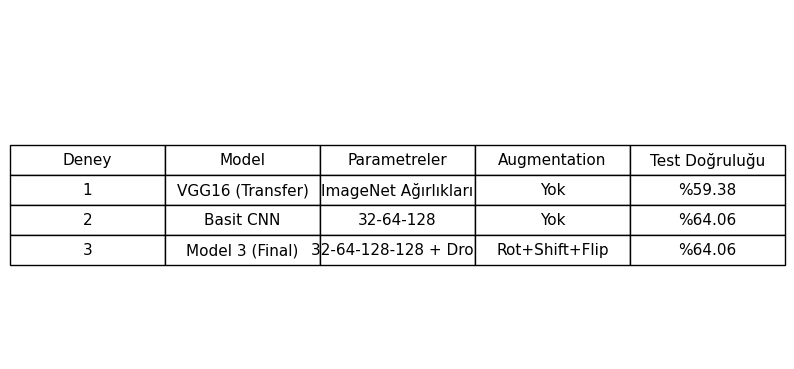

Model 3 Final Sonucu: %64.06


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

acc_model1 = 59.38
acc_model2 = 64.06
acc_model3 = 64.06

df = pd.DataFrame({
    "Deney": ["1", "2", "3"],
    "Model": ["VGG16 (Transfer)", "Basit CNN", "Model 3 (Final)"],
    "Parametreler": ["ImageNet Ağırlıkları", "32-64-128", "32-64-128-128 + Drop"],
    "Augmentation": ["Yok", "Yok", "Rot+Shift+Flip"],
    "Test Doğruluğu": [f"%{acc_model1}", f"%{acc_model2}", f"%{acc_model3}"]
})

fig, ax = plt.subplots(figsize=(10, 4))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.scale(1, 1.8)
table.auto_set_font_size(False)
table.set_fontsize(11)

for key, cell in table.get_celld().items():
    cell.set_facecolor('white')
    cell.set_edgecolor('black')
    cell.set_text_props(color='black')

plt.title("Proje 1 Final Sonuç Tablosu", color='white', pad=20)
plt.show()

print(f"Model 3 Final Sonucu: %{acc_model3}")